In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [6]:
# Assuming the file is an Excel file
file_path = r'C:/Users/maury/OneDrive/Desktop/flipkart_sales_data.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows of the DataFrame to ensure it's loaded correctly
print(df.head())


                                  name  offer_price  original_price  off_now  \
0       APPLE iPhone 13 (Blue, 128 GB)        57990           69900  17% off   
1      APPLE iPhone 11 (White, 128 GB)        41990           48900  14% off   
2   APPLE iPhone 13 (Midnight, 128 GB)        57990           69900  17% off   
3                             IAIR D25         1098            1699  35% off   
4  APPLE iPhone 13 (Starlight, 128 GB)        58990           69900  15% off   

   total_ratings  total_reviews  rating  \
0          13052           1036     4.6   
1          96244           7044     4.6   
2          13052           1036     4.6   
3             11              8     4.1   
4          13052           1036     4.6   

                                         description  \
0  ['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...   
1  ['128 GB ROM', '15.49 cm (6.1 inch) Liquid Ret...   
2  ['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...   
3  ['32 MB RAM | 32 MB ROM', '4.32 c

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            936 non-null    object 
 1   offer_price     936 non-null    int64  
 2   original_price  936 non-null    int64  
 3   off_now         936 non-null    object 
 4   total_ratings   936 non-null    int64  
 5   total_reviews   936 non-null    int64  
 6   rating          936 non-null    float64
 7   description     936 non-null    object 
 8   created_at      936 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 65.9+ KB


In [8]:
df.head()

,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,created_at
0,"APPLE iPhone 13 (Blue, 128 GB)",57990,69900,17% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.702432+05:30
1,"APPLE iPhone 11 (White, 128 GB)",41990,48900,14% off,96244,7044,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Liquid Ret...",2022-09-23 22:37:42.703432+05:30
2,"APPLE iPhone 13 (Midnight, 128 GB)",57990,69900,17% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.703432+05:30
3,IAIR D25,1098,1699,35% off,11,8,4.1,"['32 MB RAM | 32 MB ROM', '4.32 cm (1.7 inch) ...",2022-09-23 22:37:42.703432+05:30
4,"APPLE iPhone 13 (Starlight, 128 GB)",58990,69900,15% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.704431+05:30


In [9]:
df.tail()

,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,created_at
931,IAIR D40,1319,1319,0,20,12,3.9,"['32 MB RAM | 32 MB ROM', '5.08 cm (2 inch) NA...",2022-09-23 22:38:19.037071+05:30
932,"Tecno Spark 8 Pro (Turquoise Cyan, 64 GB)",11299,11299,0,93,9,4.3,"['4 GB RAM | 64 GB ROM', '17.27 cm (6.8 inch) ...",2022-09-23 22:38:19.037071+05:30
933,Salora Zing+,999,999,0,436,55,3.8,"['32 MB RAM | 32 MB ROM', '6.1 cm (2.4 inch) V...",2022-09-23 22:38:19.037071+05:30
934,KARBONN K9 SHAKTI,1469,1469,0,79,6,3.7,['35 MB RAM | 35 MB ROM | Expandable Upto 32 G...,2022-09-23 22:38:19.038072+05:30
935,IAIR D24,1128,1128,0,75,25,3.8,"['32 MB RAM | 32 MB ROM', '4.5 cm (1.77 inch) ...",2022-09-23 22:38:19.038072+05:30


In [10]:
df.describe()

,offer_price,original_price,total_ratings,total_reviews,rating
count,936.000000,936.000000,936.000000,936.000000,936.000000
mean,11242.331197,13757.044872,18208.330128,1409.120726,3.930876
std,15417.096464,18568.439431,51261.702658,3737.772044,0.907837
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1319.000000,1449.000000,75.000000,12.000000,3.900000
50%,7990.000000,9699.000000,1173.000000,107.500000,4.100000
75%,14999.000000,18999.000000,12711.000000,1045.000000,4.300000
max,119990.000000,139900.000000,569954.000000,39188.000000,4.800000


In [11]:
df.shape

(936, 9)

In [12]:
# Find the index of the row with the highest price
highest_price_index = df['original_price'].idxmax()

# Retrieve the highest price and corresponding phone's information
highest_price = df.loc[highest_price_index, 'original_price']
highest_price_phone = df.loc[highest_price_index, 'name']

print("The phone with the highest price is:", highest_price_phone)
print("The highest price of the phone is:", highest_price)



The phone with the highest price is: APPLE iPhone 13 Pro Max (Alpine Green, 256 GB)
The highest price of the phone is: 139900


In [13]:
# Find the index of the row with the highest price
lowest_price_index = df['offer_price'].idxmin()

# Retrieve the highest price and corresponding phone's information
lowest_price = df.loc[lowest_price_index, 'offer_price']
lowest_price_phone = df.loc[lowest_price_index, 'name']

print("The phone with the lowest price is:", lowest_price_phone)
print("The lowest price of the phone is:", lowest_price)


The phone with the lowest price is: OnePlus Nord 2T 5G (Jade Fog, 128 GB)
The lowest price of the phone is: 0


In [14]:
df.dropna()

,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,created_at
0,"APPLE iPhone 13 (Blue, 128 GB)",57990,69900,17% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.702432+05:30
1,"APPLE iPhone 11 (White, 128 GB)",41990,48900,14% off,96244,7044,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Liquid Ret...",2022-09-23 22:37:42.703432+05:30
2,"APPLE iPhone 13 (Midnight, 128 GB)",57990,69900,17% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.703432+05:30
3,IAIR D25,1098,1699,35% off,11,8,4.1,"['32 MB RAM | 32 MB ROM', '4.32 cm (1.7 inch) ...",2022-09-23 22:37:42.703432+05:30
4,"APPLE iPhone 13 (Starlight, 128 GB)",58990,69900,15% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.704431+05:30
...,...,...,...,...,...,...,...,...,...
931,IAIR D40,1319,1319,0,20,12,3.9,"['32 MB RAM | 32 MB ROM', '5.08 cm (2 inch) NA...",2022-09-23 22:38:19.037071+05:30
932,"Tecno Spark 8 Pro (Turquoise Cyan, 64 GB)",11299,11299,0,93,9,4.3,"['4 GB RAM | 64 GB ROM', '17.27 cm (6.8 inch) ...",2022-09-23 22:38:19.037071+05:30
933,Salora Zing+,999,999,0,436,55,3.8,"['32 MB RAM | 32 MB ROM', '6.1 cm (2.4 inch) V...",2022-09-23 22:38:19.037071+05:30
934,KARBONN K9 SHAKTI,1469,1469,0,79,6,3.7,['35 MB RAM | 35 MB ROM | Expandable Upto 32 G...,2022-09-23 22:38:19.038072+05:30


In [15]:
df.dropna(axis=1)

,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,created_at
0,"APPLE iPhone 13 (Blue, 128 GB)",57990,69900,17% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.702432+05:30
1,"APPLE iPhone 11 (White, 128 GB)",41990,48900,14% off,96244,7044,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Liquid Ret...",2022-09-23 22:37:42.703432+05:30
2,"APPLE iPhone 13 (Midnight, 128 GB)",57990,69900,17% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.703432+05:30
3,IAIR D25,1098,1699,35% off,11,8,4.1,"['32 MB RAM | 32 MB ROM', '4.32 cm (1.7 inch) ...",2022-09-23 22:37:42.703432+05:30
4,"APPLE iPhone 13 (Starlight, 128 GB)",58990,69900,15% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.704431+05:30
...,...,...,...,...,...,...,...,...,...
931,IAIR D40,1319,1319,0,20,12,3.9,"['32 MB RAM | 32 MB ROM', '5.08 cm (2 inch) NA...",2022-09-23 22:38:19.037071+05:30
932,"Tecno Spark 8 Pro (Turquoise Cyan, 64 GB)",11299,11299,0,93,9,4.3,"['4 GB RAM | 64 GB ROM', '17.27 cm (6.8 inch) ...",2022-09-23 22:38:19.037071+05:30
933,Salora Zing+,999,999,0,436,55,3.8,"['32 MB RAM | 32 MB ROM', '6.1 cm (2.4 inch) V...",2022-09-23 22:38:19.037071+05:30
934,KARBONN K9 SHAKTI,1469,1469,0,79,6,3.7,['35 MB RAM | 35 MB ROM | Expandable Upto 32 G...,2022-09-23 22:38:19.038072+05:30


In [16]:
df.drop_duplicates()


,name,offer_price,original_price,off_now,total_ratings,total_reviews,rating,description,created_at
0,"APPLE iPhone 13 (Blue, 128 GB)",57990,69900,17% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.702432+05:30
1,"APPLE iPhone 11 (White, 128 GB)",41990,48900,14% off,96244,7044,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Liquid Ret...",2022-09-23 22:37:42.703432+05:30
2,"APPLE iPhone 13 (Midnight, 128 GB)",57990,69900,17% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.703432+05:30
3,IAIR D25,1098,1699,35% off,11,8,4.1,"['32 MB RAM | 32 MB ROM', '4.32 cm (1.7 inch) ...",2022-09-23 22:37:42.703432+05:30
4,"APPLE iPhone 13 (Starlight, 128 GB)",58990,69900,15% off,13052,1036,4.6,"['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...",2022-09-23 22:37:42.704431+05:30
...,...,...,...,...,...,...,...,...,...
931,IAIR D40,1319,1319,0,20,12,3.9,"['32 MB RAM | 32 MB ROM', '5.08 cm (2 inch) NA...",2022-09-23 22:38:19.037071+05:30
932,"Tecno Spark 8 Pro (Turquoise Cyan, 64 GB)",11299,11299,0,93,9,4.3,"['4 GB RAM | 64 GB ROM', '17.27 cm (6.8 inch) ...",2022-09-23 22:38:19.037071+05:30
933,Salora Zing+,999,999,0,436,55,3.8,"['32 MB RAM | 32 MB ROM', '6.1 cm (2.4 inch) V...",2022-09-23 22:38:19.037071+05:30
934,KARBONN K9 SHAKTI,1469,1469,0,79,6,3.7,['35 MB RAM | 35 MB ROM | Expandable Upto 32 G...,2022-09-23 22:38:19.038072+05:30


In [17]:
pd.to_datetime(df['created_at'])

0     2022-09-23 22:37:42.702432+05:30
1     2022-09-23 22:37:42.703432+05:30
2     2022-09-23 22:37:42.703432+05:30
3     2022-09-23 22:37:42.703432+05:30
4     2022-09-23 22:37:42.704431+05:30
                    ...               
931   2022-09-23 22:38:19.037071+05:30
932   2022-09-23 22:38:19.037071+05:30
933   2022-09-23 22:38:19.037071+05:30
934   2022-09-23 22:38:19.038072+05:30
935   2022-09-23 22:38:19.038072+05:30
Name: created_at, Length: 936, dtype: datetime64[ns, UTC+05:30]

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [19]:
print("Basic Statistics of Offer Prices:")
print(df['offer_price'].describe())

print("\nBasic Statistics of Original Prices:")
print(df['original_price'].describe())

Basic Statistics of Offer Prices:
count       936.000000
mean      11242.331197
std       15417.096464
min           0.000000
25%        1319.000000
50%        7990.000000
75%       14999.000000
max      119990.000000
Name: offer_price, dtype: float64

Basic Statistics of Original Prices:
count       936.000000
mean      13757.044872
std       18568.439431
min           0.000000
25%        1449.000000
50%        9699.000000
75%       18999.000000
max      139900.000000
Name: original_price, dtype: float64


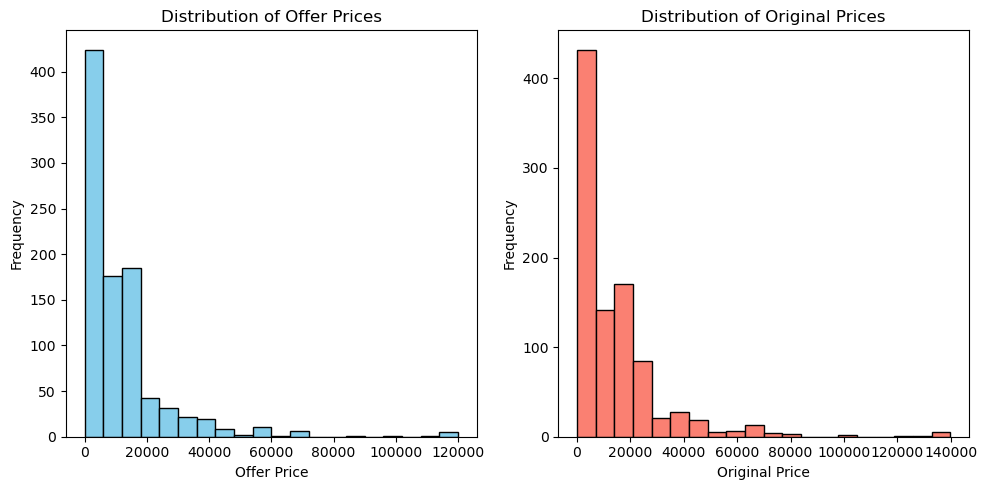

In [20]:
#Price analysis :Original Price VS Offer price
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['offer_price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Offer Prices')
plt.xlabel('Offer Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['original_price'], bins=20, color='salmon', edgecolor='black')
plt.title('Distribution of Original Prices')
plt.xlabel('Original Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [21]:
#DISCOUNT ANALYSIS#
df['discount'] = df['original_price'] - df['offer_price']
df['discount_percentage'] = (df['discount'] / df['original_price']) * 100

print("\nAverage Discount Percentage:", df['discount_percentage'].mean())


Average Discount Percentage: 12.961643983042201


In [22]:
# Group by smartphone name and calculate total ratings or total reviews
top_selling_smartphones = df.groupby('name').agg({'total_ratings': 'sum', 'total_reviews': 'sum'})

# Sort smartphones by total ratings or total reviews in descending order
top_selling_smartphones = top_selling_smartphones.sort_values(by=['total_ratings', 'total_reviews'], ascending=False)

# Display the top selling smartphones
print(top_selling_smartphones.head())


                                          total_ratings  total_reviews
name                                                                  
SAMSUNG Guru Music 2                             574512          54001
REDMI 9i (Midnight Black, 64 GB)                 569954          33858
realme Narzo 20 (Glory Silver, 64 GB)            517438          39188
realme Narzo 20 (Victory Blue, 128 GB)           517438          39188
POCO M2 Pro (Two Shades of Black, 64 GB)         347951          33172


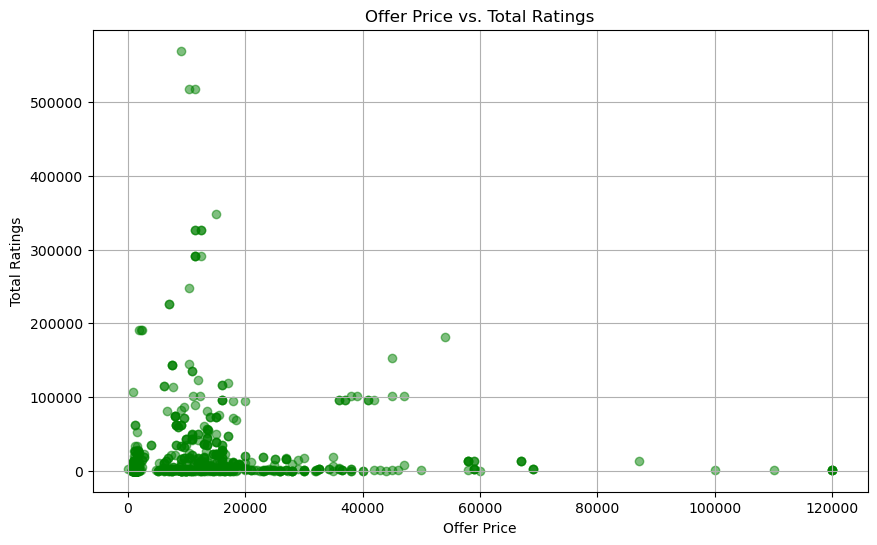

In [60]:
# Price vs. Sales Volume
plt.figure(figsize=(10, 6))
plt.scatter(df['offer_price'], df['total_ratings'], color='green', alpha=0.5)
plt.title('Offer Price vs. Total Ratings')
plt.xlabel('Offer Price')
plt.ylabel('Total Ratings')
plt.grid(True)
plt.show()

In [25]:
#PRICE SENSITIVITY#
# Calculating the percentage discount offered
df['discount_percentage'] = ((df['original_price'] - df['offer_price']) / df['original_price']) * 100

# Definining a function to categorize price sensitivity based on discount percentage
def price_sensitivity_category(discount):
    if discount >= 20:
        return 'Highly Sensitive'
    elif discount >= 10:
        return 'Moderately Sensitive'
    else:
        return 'Less Sensitive'

# Applying the function to create a new column for price sensitivity category
df['price_sensitivity'] = df['discount_percentage'].apply(price_sensitivity_category)

# Displaying the DataFrame with the added columns
print(df.head())
print(df.tail())


                                  name  offer_price  original_price  off_now  \
0       APPLE iPhone 13 (Blue, 128 GB)        57990           69900  17% off   
1      APPLE iPhone 11 (White, 128 GB)        41990           48900  14% off   
2   APPLE iPhone 13 (Midnight, 128 GB)        57990           69900  17% off   
3                             IAIR D25         1098            1699  35% off   
4  APPLE iPhone 13 (Starlight, 128 GB)        58990           69900  15% off   

   total_ratings  total_reviews  rating  \
0          13052           1036     4.6   
1          96244           7044     4.6   
2          13052           1036     4.6   
3             11              8     4.1   
4          13052           1036     4.6   

                                         description  \
0  ['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...   
1  ['128 GB ROM', '15.49 cm (6.1 inch) Liquid Ret...   
2  ['128 GB ROM', '15.49 cm (6.1 inch) Super Reti...   
3  ['32 MB RAM | 32 MB ROM', '4.32 c

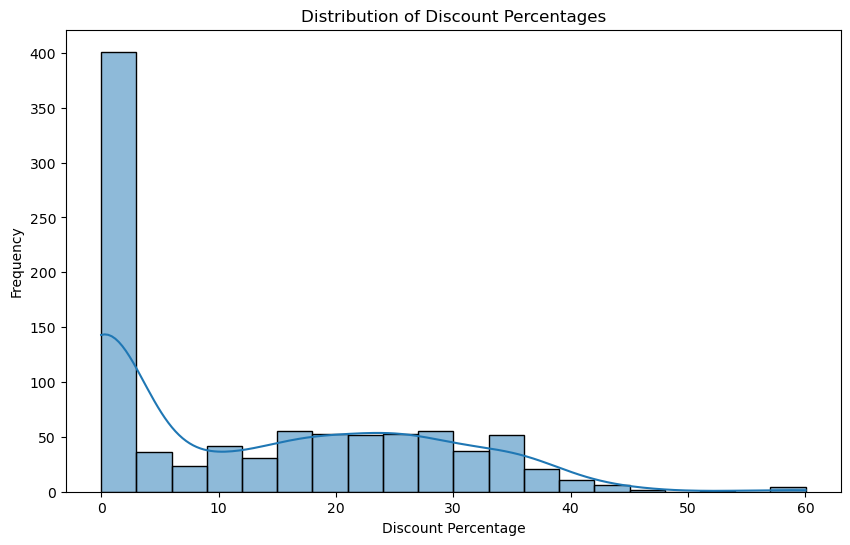

In [28]:
# Creating a histogram of discount percentages
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='discount_percentage', bins=20, kde=True)
plt.title('Distribution of Discount Percentages')
plt.xlabel('Discount Percentage')
plt.ylabel('Frequency')
plt.show()




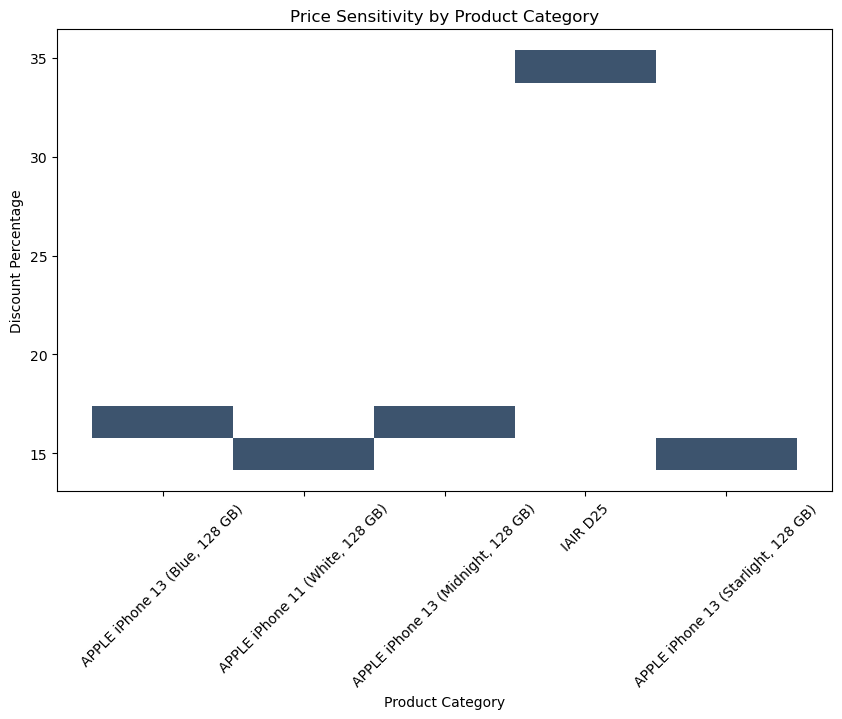

In [61]:
# Select the first four samples
first_four_samples = df.head(5)

# Creating a box plot of discount percentages for different product categories
plt.figure(figsize=(10, 6))
sns.histplot(data=first_four_samples, x='name', y='discount_percentage')
plt.title('Price Sensitivity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=45)
plt.show()



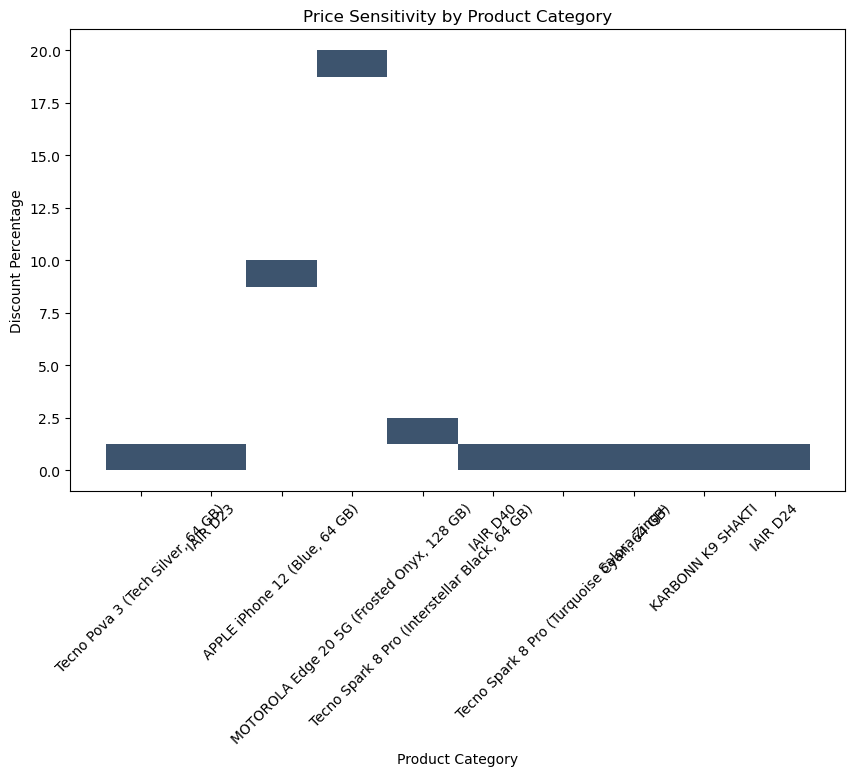

In [62]:
# Select the first four samples
first_four_samples = df.tail(10)

# Create a histplot of discount percentages for different product categories
plt.figure(figsize=(10, 6))
sns.histplot(data=first_four_samples, x='name', y='discount_percentage')
plt.title('Price Sensitivity by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Discount Percentage')
plt.xticks(rotation=45)
plt.show()

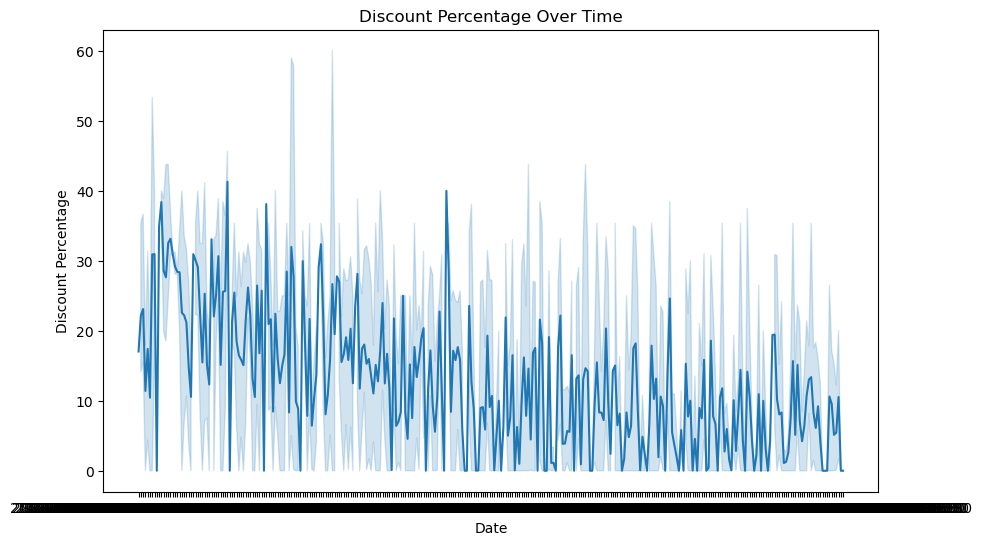

In [44]:
# Create a time series plot of discount percentages over time
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='created_at', y='discount_percentage')
plt.title('Discount Percentage Over Time')
plt.xlabel('Date')
plt.ylabel('Discount Percentage')
plt.show()




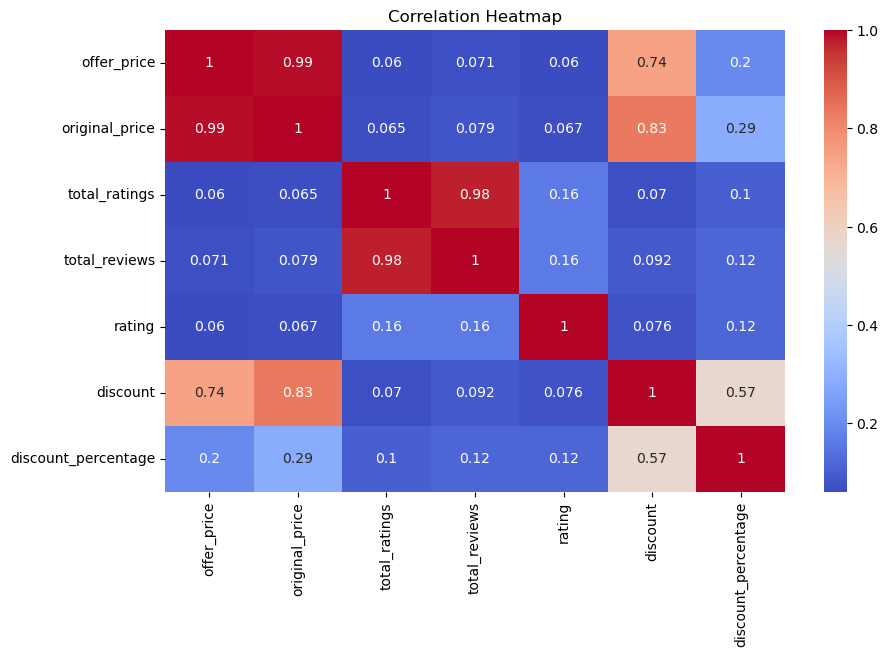

In [45]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])
# Creating a heatmap of the correlation between discount percentage, sales volume, and other metrics
# Creating a heatmap of the correlation between numeric columns
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
